In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Importing dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [4]:
print(y)

[1 0 1 ... 1 1 0]


Preprocessing

In [5]:
from sklearn.compose import ColumnTransformer
lencoder = LabelEncoder()
x[:, 2] = lencoder.fit_transform(x[:, 2])
oencoder = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x.shape)

(10000, 12)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
model.add(tf.keras.layers.Dense(20, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=32, epochs=200, verbose=2)

Epoch 1/200
250/250 - 1s - loss: 0.1529 - accuracy: 0.7885 - 676ms/epoch - 3ms/step
Epoch 2/200
250/250 - 0s - loss: 0.1306 - accuracy: 0.8269 - 340ms/epoch - 1ms/step
Epoch 3/200
250/250 - 0s - loss: 0.1273 - accuracy: 0.8334 - 336ms/epoch - 1ms/step
Epoch 4/200
250/250 - 0s - loss: 0.1265 - accuracy: 0.8342 - 331ms/epoch - 1ms/step
Epoch 5/200
250/250 - 0s - loss: 0.1251 - accuracy: 0.8359 - 332ms/epoch - 1ms/step
Epoch 6/200
250/250 - 0s - loss: 0.1218 - accuracy: 0.8390 - 323ms/epoch - 1ms/step
Epoch 7/200
250/250 - 0s - loss: 0.1122 - accuracy: 0.8551 - 323ms/epoch - 1ms/step
Epoch 8/200
250/250 - 0s - loss: 0.1078 - accuracy: 0.8591 - 327ms/epoch - 1ms/step
Epoch 9/200
250/250 - 0s - loss: 0.1058 - accuracy: 0.8574 - 332ms/epoch - 1ms/step
Epoch 10/200
250/250 - 0s - loss: 0.1046 - accuracy: 0.8601 - 346ms/epoch - 1ms/step
Epoch 11/200
250/250 - 0s - loss: 0.1040 - accuracy: 0.8633 - 330ms/epoch - 1ms/step
Epoch 12/200
250/250 - 0s - loss: 0.1031 - accuracy: 0.8629 - 341ms/epoch 

Text(0.5, 1.0, 'accuracy')

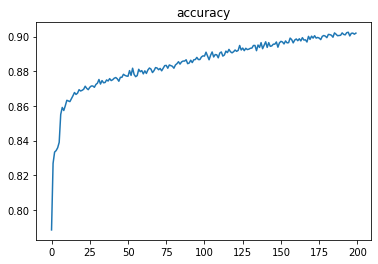

In [10]:
accuracy = history.history['accuracy']
plt.plot(accuracy)
plt.title('accuracy')

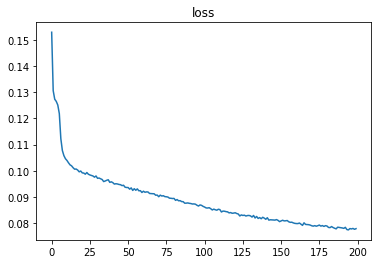

In [11]:
loss = history.history['loss']
plt.plot(loss)
plt.title('loss')
plt.show()

In [13]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [15]:
y_pred = model.predict(x_test) > 0.5
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1478  117]
 [ 195  210]]


0.844